# "OLYMPICS_DATA" - PYTHON AND CS CAPSTONE PROJECT:

#### Attributes information :-
| **Attributes** | **Information** |
| --- | --- | 
| **Name** | **Name of the athlete in that event**|
| **Age** | **Age of the athlete in that mention year**|
| **Country** | **Country to which the athlete belongs to**|
| **Year** | **Year in which the Olympic Games were held**|
| **Date_Given** | **The date when Olympic Games were conducted**|
| **Sports** | **Categories of the all sports that are conducted (eg. Baseball, Cycling, Football and etc..,)**|
| **Medals** | **Medals ( Gold_medal, Silver_medal and Bronze_medal )**| 

#### PROBLEM STATEMENT :
* **Step 2 (Python and DS): Read the dataset in pandas and perform the steps as suggested.**

 1. **Please do the basic exploration of the data. Remember the dataset contains information from different years. So whatever steps you perform should make logical sense.**
 2. **Deal with missing values appropriately. You can either remove them or fill them, but a proper justification is required.**
 3. **Duplicates in the dataset introduces bias in the study. Please check and perform appropriate steps.**
 4. **Please remove special characters from the name column.**
 5. **Perform data visualization techniques to appropriate columns and explain them.**
 6. **Please check if the age dataset is skewed or symmetric. Based on results perform transformation.**
 7. **Please perform appropriate numerical measures on each column and report them accordingly.**
 8. **Please list the top 10 countries with the gold medal, then top10 countries with the silver medal, then bronze medal and the total medal.**

In [74]:
# IMPORTING REQUIRED LIBRARIES 
import pandas as pd
import numpy as np

## LIBRARIES FOR DATA VISUALIZATION
import matplotlib.pyplot as plt
import seaborn as sns

## ALLOWS TO HANDLE THE WARNINGS
import warnings 
warnings.filterwarnings("ignore")
from scipy import stats
from scipy.stats import boxcox
import missingno as msno
pd.pandas.set_option('display.max_columns',None)

In [75]:
# READING THE DATA SET INTO PANDAS

olympics = pd.read_csv("olympix_data_organized_with_header (1).csv")
olympics

name   age        country  year  Date_Given      sports  \
0           Michael Phelps  23.0  United States  2008   8/24/2008    Swimming   
1           Michael Phelps  19.0  United States  2004   8/29/2004    Swimming   
2           Michael Phelps  27.0  United States  2012  08-12-2012    Swimming   
3         Natalie Coughlin  25.0  United States  2008   8/24/2008    Swimming   
4            Aleksey Nemov  24.0         Russia  2000  10-01-2000  Gymnastics   
...                    ...   ...            ...   ...         ...         ...   
8613      Olena Sadovnycha  32.0        Ukraine  2000  10-01-2000     Archery   
8614      Kateryna Serdiuk  17.0        Ukraine  2000  10-01-2000     Archery   
8615      Wietse van Alten  21.0    Netherlands  2000  10-01-2000     Archery   
8616  Sandra Wagner-Sachse  31.0        Germany  2000  10-01-2000     Archery   
8617             Rod White  23.0  United States  2000  10-01-2000     Archery   

      gold_medal  silver_medal  brone_medal  total_medal  
0              8             0            0            8  
1              6             0            2            8  
2              4             2            0            6  
3              1             2            3            6  
4              2             1            3            6  
...          ...           ...          ...          ...  
8613           0             1            0            1  
8614           0             1            0            1  
8615           0             0            1            1  
8616           0             0            1            1  
8617           0             0            1            1  

[8618 rows x 10 columns]

###### Q1. Please do the basic exploration of the data. Remember the dataset contains information from different years. So whatever steps you perform should make logical sense.

In [76]:
# PRINTING TOP 5 OBSERVATIONS USING HEAD() FUNCTION TO COMPARE WITH LAST 5 OBSERAVATIONS

olympics.head()

name   age        country  year  Date_Given      sports  \
0    Michael Phelps  23.0  United States  2008   8/24/2008    Swimming   
1    Michael Phelps  19.0  United States  2004   8/29/2004    Swimming   
2    Michael Phelps  27.0  United States  2012  08-12-2012    Swimming   
3  Natalie Coughlin  25.0  United States  2008   8/24/2008    Swimming   
4     Aleksey Nemov  24.0         Russia  2000  10-01-2000  Gymnastics   

   gold_medal  silver_medal  brone_medal  total_medal  
0           8             0            0            8  
1           6             0            2            8  
2           4             2            0            6  
3           1             2            3            6  
4           2             1            3            6

In [77]:
# PRINTING LAST 5 OBSSERVATIONS TO OBSERVE WHETHER THE DATASET IS IN PROPER WAY OR NOT AS FIRST 5 OBSERVATIONS 

olympics.tail()

name   age        country  year  Date_Given   sports  \
8613      Olena Sadovnycha  32.0        Ukraine  2000  10-01-2000  Archery   
8614      Kateryna Serdiuk  17.0        Ukraine  2000  10-01-2000  Archery   
8615      Wietse van Alten  21.0    Netherlands  2000  10-01-2000  Archery   
8616  Sandra Wagner-Sachse  31.0        Germany  2000  10-01-2000  Archery   
8617             Rod White  23.0  United States  2000  10-01-2000  Archery   

      gold_medal  silver_medal  brone_medal  total_medal  
8613           0             1            0            1  
8614           0             1            0            1  
8615           0             0            1            1  
8616           0             0            1            1  
8617           0             0            1            1

In [78]:
# CHECKING HOW MANY ROWS AND COLUMNS ARE IN THE DATASET

olympics.shape

(8618, 10)

In [79]:
# CHECKING TOTAL SIZE OF THE DATASET

olympics.size

86180

In [80]:
# CHECKING THE INFORMATION OF THE DATASET

olympics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8618 entries, 0 to 8617
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          8613 non-null   object 
 1   age           8613 non-null   float64
 2   country       8618 non-null   object 
 3   year          8618 non-null   int64  
 4   Date_Given    8618 non-null   object 
 5   sports        8618 non-null   object 
 6   gold_medal    8618 non-null   int64  
 7   silver_medal  8618 non-null   int64  
 8   brone_medal   8618 non-null   int64  
 9   total_medal   8618 non-null   int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 673.4+ KB


* **We can see that in this dataset there are 8618 observations and 10 variables present.**
* **In this 5 null values are there in name and age columns.**
* **And also python reading year column as int. But it should be object type.**

###### ==> CHANGING 'YEAR' COLUMN DATA TYPE :

In [81]:
# CHANGING THE YEAR COLUMN DATA TYPE AS INTEGER TO OBJECT TYPE DATA.

olympics = olympics.astype({"year": str}, errors='raise') 
olympics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8618 entries, 0 to 8617
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          8613 non-null   object 
 1   age           8613 non-null   float64
 2   country       8618 non-null   object 
 3   year          8618 non-null   object 
 4   Date_Given    8618 non-null   object 
 5   sports        8618 non-null   object 
 6   gold_medal    8618 non-null   int64  
 7   silver_medal  8618 non-null   int64  
 8   brone_medal   8618 non-null   int64  
 9   total_medal   8618 non-null   int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 673.4+ KB


* **Now as we can see 'year' column reading as 'object' type.**

In [82]:
# CHECKING THE NULL VALUES THAT ARE PRESENT IN THE DATASET

olympics.isnull().sum()

name            5
age             5
country         0
year            0
Date_Given      0
sports          0
gold_medal      0
silver_medal    0
brone_medal     0
total_medal     0
dtype: int64

In [83]:
# PRINTING THE ROWS WHICH HAVE THE NULL VALUES

olympic_null = olympics.isnull().any(axis=1)
olympic_null = olympics[olympic_null]
olympic_null

name  age    country  year  Date_Given      sports  gold_medal  \
1428  NaN  NaN     Brazil  2012  08-12-2012  Volleyball           0   
1429  NaN  NaN     Brazil  2012  08-12-2012  Volleyball           0   
1430  NaN  NaN     Brazil  2012  08-12-2012  Volleyball           0   
4485  NaN  NaN  Argentina  2012  08-12-2012      Hockey           0   
4486  NaN  NaN  Argentina  2012  08-12-2012      Hockey           0   

      silver_medal  brone_medal  total_medal  
1428             1            0            1  
1429             1            0            1  
1430             1            0            1  
4485             1            0            1  
4486             1            0            1

In [84]:
# CHECKING THE UNIQUE VALUES IN EACH COLUMN

olympics.nunique()

name            6955
age               42
country          110
year               7
Date_Given         7
sports            49
gold_medal         7
silver_medal       4
brone_medal        4
total_medal        7
dtype: int64

###### Q3. Duplicates in the dataset introduces bias in the study. Please check and perform appropriate steps.

In [85]:
# CHECKING THE DUPLICATED VALUES THAT ARE PRESENT IN THE DATASET

olympics.duplicated().sum()

3

In [86]:
# DROPING THOSE DUPLICATES VALUES AND SAVING IN NEW DATASET 

Olympic = olympics.drop_duplicates()

###### Q2. Deal with missing values appropriately. You can either remove them or fill them, but a proper justification is required.

In [87]:
# AGAIN CHECKING THE NULL VALUES AFTER DROPING DUPLICATES 

Olympic.isnull().sum()

name            2
age             2
country         0
year            0
Date_Given      0
sports          0
gold_medal      0
silver_medal    0
brone_medal     0
total_medal     0
dtype: int64

In [88]:
# PRINTING THE ROWS WHICH HAVE REMAING TWO NULL VALUES

olympic_null = Olympic.isnull().any(axis=1)
olympic_null = Olympic[olympic_null]
olympic_null

name  age    country  year  Date_Given      sports  gold_medal  \
1428  NaN  NaN     Brazil  2012  08-12-2012  Volleyball           0   
4485  NaN  NaN  Argentina  2012  08-12-2012      Hockey           0   

      silver_medal  brone_medal  total_medal  
1428             1            0            1  
4485             1            0            1

###### As we can see here rows having null values and we can drop it which will not that much affect on the dataset. But we are going to replace the values due to which stability of the dataset will be maintain.
 * **We will replace the 'age' column with the 'mean' value of the age column**
 * **And the 'name' column with string UNKNOWN**.

In [89]:
# REPLACING THE AGE COLUMN NULL VALUES WITH MEAN OF AGE COLUMN
# SO, FINDING THE MEAN OF THE AGE COLUMN 

age_mean = Olympic['age'].mean()
age_mean

26.405433646812956

* **The mean of the age column is '26.4'. So, Now replacing age column null values with '26.4'.**
 
* **And also filling name column null values with string 'UNKNOWN'.**

In [90]:
# FILLING AGE COLUMN NULL VALUES WITH 26.4 WHICH IS MEAN OF THAT COLUMN
# FILLING NAME COLUMN NULL VALUES WITH STRING 'UNKNOWN'

Olympic['age'].fillna(26.4, inplace = True)
Olympic['name'].fillna('UNKNOWN', inplace = True)

In [91]:
# ANGAIN CHECKING NULL VALUES

Olympic.isnull().sum()

name            0
age             0
country         0
year            0
Date_Given      0
sports          0
gold_medal      0
silver_medal    0
brone_medal     0
total_medal     0
dtype: int64

###### Q4. Please remove special characters from the name column.

In [92]:
# WE HAVE SO MANY SPECIAL CHARACTERS IN THIS DATASET 
# REMOVING THOSE SPECIAL CHARACTERS USING REGEX

Olympic['name'] = Olympic['name'].replace('[^sa-zA-Z]', ' ', regex =True)
Olympic.T

0               1               2     \
name          Michael Phelps  Michael Phelps  Michael Phelps   
age                     23.0            19.0            27.0   
country        United States   United States   United States   
year                    2008            2004            2012   
Date_Given         8/24/2008       8/29/2004      08-12-2012   
sports              Swimming        Swimming        Swimming   
gold_medal                 8               6               4   
silver_medal               0               0               2   
brone_medal                0               2               0   
total_medal                8               8               6   

                          3              4              5               6     \
name          Natalie Coughlin  Aleksey Nemov  Alicia Coutts  Missy Franklin   
age                       25.0           24.0           24.0            17.0   
country          United States         Russia      Australia   United States   
year                      2008           2000           2012            2012   
Date_Given           8/24/2008     10-01-2000     08-12-2012      08-12-2012   
sports                Swimming     Gymnastics       Swimming        Swimming   
gold_medal                   1              2              1               4   
silver_medal                 2              1              3               0   
brone_medal                  3              3              1               1   
total_medal                  6              6              5               5   

                       7                8                 9           10    \
name            Ryan Lochte  Allison Schmitt  Natalie Coughlin  Ian Thorpe   
age                    27.0             22.0              21.0        17.0   
country       United States    United States     United States   Australia   
year                   2012             2012              2004        2000   
Date_Given       08-12-2012       08-12-2012         8/29/2004  10-01-2000   
sports             Swimming         Swimming          Swimming    Swimming   
gold_medal                2                3                 2           3   
silver_medal              2                1                 2           2   
brone_medal               1                1                 1           0   
total_medal               5                5                 5           5   

                       11             12             13    \
name            Dara Torres  Cindy Klassen  Nastia Liukin   
age                    33.0           26.0           18.0   
country       United States         Canada  United States   
year                   2000           2006           2008   
Date_Given       10-01-2000      2/26/2006      8/24/2008   
sports             Swimming  Speed Skating     Gymnastics   
gold_medal                2              1              1   
silver_medal              0              2              3   
brone_medal               3              2              1   
total_medal               5              5              5   

                              14          15               16    \
name                 Marit Bj rgen    Sun Yang  Kirsty Coventry   
age                           29.0        20.0             24.0   
country                     Norway       China         Zimbabwe   
year                          2010        2012             2008   
Date_Given               2/28/2010  08-12-2012        8/24/2008   
sports        Cross Country Skiing    Swimming         Swimming   
gold_medal                       3           2                1   
silver_medal                     1           1                3   
brone_medal                      1           1                0   
total_medal                      5           4                4   

                               17             18              19    \
name          Libby Lenton Trickett    Ryan Lochte  Inge de Bruijn   
age                          

* **After removing special characters there are no special characters in name column.**

### Now, Our data is completely clean. And saving this clean dataset to csv file for 'MySql' and 'Pyspark'

In [93]:
Olympic.to_csv(r'K:\FINAL CAPSTONE PROJECT\olympic_data.csv', index=False)

###### Q5. Perform data visualization techniques to appropriate columns and explain them.  

**1.UNIVARIATE ANALYSIS :**
* **Univariate analysis is basically the simplest form to analyze data. Uni means one and this means that the data has only one kind of variable. The major reason for univariate analysis is to use the data to describe. The analysis will take data, summarise it, and then find some pattern in the data.**

<function matplotlib.pyplot.show(close=None, block=None)>

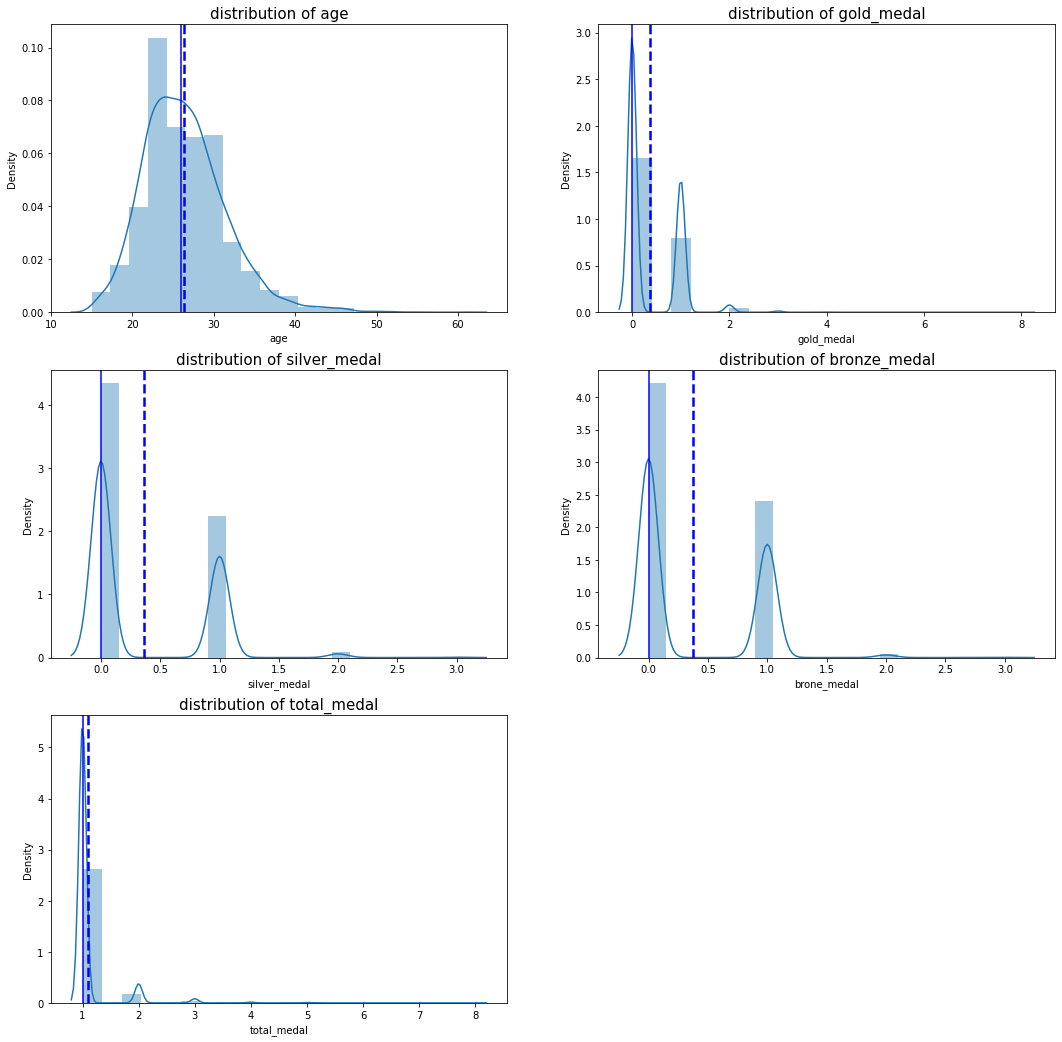

In [94]:
## CHECKING THE DISTRIBUTION OF ALL NUMERICAL DATA BY USING 'DISTPLOT'

## GIVING FIGURE SIZE
## CHECKING NUMERICAL DATA DISTRIBUTION BY USING DISTRIBUTION PLOT 
## GIVING TITLE TO PLOT 
## GIVING MEAN AND MEDIAN LINES ALONG WITH DISTRIBUTION

plt.figure(figsize = (18,18))   
plt.subplot(3,2,1)
sns.distplot(Olympic['age'],bins = 20, kde = True)
plt.title('distribution of age',fontsize=15)   
plt.axvline(x=Olympic['age'].mean(),ls='--',lw=2.5,color='blue',label="mean")  # fixing 'mean' line and its characteristics.
plt.axvline(x=Olympic['age'].median(),color='blue',label="median") # fixing 'median' line and its characteristics.
plt.show

plt.subplot(3,2,2)
sns.distplot(Olympic['gold_medal'],bins = 20, kde = True)
plt.title('distribution of gold_medal',fontsize=15)   
plt.axvline(x=Olympic['gold_medal'].mean(),ls='--',lw=2.5,color='blue',label="mean")  # fixing 'mean' line and its characteristics.
plt.axvline(x=Olympic['gold_medal'].median(),color='blue',label="median") # fixing 'median' line and its characteristics.
plt.show

plt.subplot(3,2,3)
sns.distplot(Olympic['silver_medal'],bins = 20, kde = True)
plt.title('distribution of silver_medal',fontsize=15)   
plt.axvline(x=Olympic['silver_medal'].mean(),ls='--',lw=2.5,color='blue',label="mean")  # fixing 'mean' line and its characteristics.
plt.axvline(x=Olympic['silver_medal'].median(),color='blue',label="median") # fixing 'median' line and its characteristics.
plt.show

plt.subplot(3,2,4)
sns.distplot(Olympic['brone_medal'],bins = 20, kde = True)
plt.title('distribution of bronze_medal',fontsize=15)   
plt.axvline(x=Olympic['brone_medal'].mean(),ls='--',lw=2.5,color='blue',label="mean")  # fixing 'mean' line and its characteristics.
plt.axvline(x=Olympic['brone_medal'].median(),color='blue',label="median") # fixing 'median' line and its characteristics.
plt.show

plt.subplot(3,2,5)
sns.distplot(Olympic['total_medal'],bins = 20, kde = True)
plt.title('distribution of total_medal',fontsize=15)   
plt.axvline(x=Olympic['total_medal'].mean(),ls='--',lw=2.5,color='blue',label="mean")  # fixing 'mean' line and its characteristics.
plt.axvline(x=Olympic['total_medal'].median(),color='blue',label="median") # fixing 'median' line and its characteristics.
plt.show

* **From above plot we can see that the distribution of all numerical data from the dataset.**
* **'Age' column is seems to be medarately right skewed. Beacuase of the participation of old athletes who are over 50-61.**
* **And remaining all are the high right skewed data.**

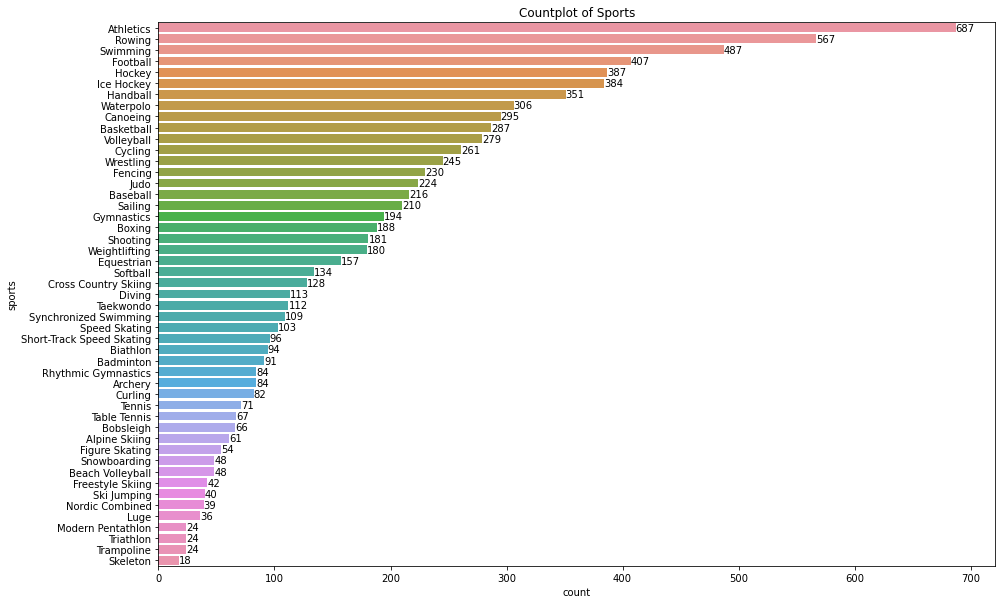

In [95]:
# BY USING COUNT PLOT VISUALIZING THAT WHICH SPORT IS PARTICIPATED MORE AND WON MORE
# AND PRINT IN DECREASING ORDER

plt.figure(figsize=(15,10))  
ax = sns.countplot(y = 'sports', data=Olympic, order = Olympic['sports'].value_counts().index)
ax.bar_label(ax.containers[0], label_type='edge')
plt.title('Countplot of Sports')
plt.show()

* **From the above plot we can see that 'Athletics' sport is conducted most and 'Rowing' is 2nd most counducted sport.**
* **And 'Skeleton' sport is conducted least.**

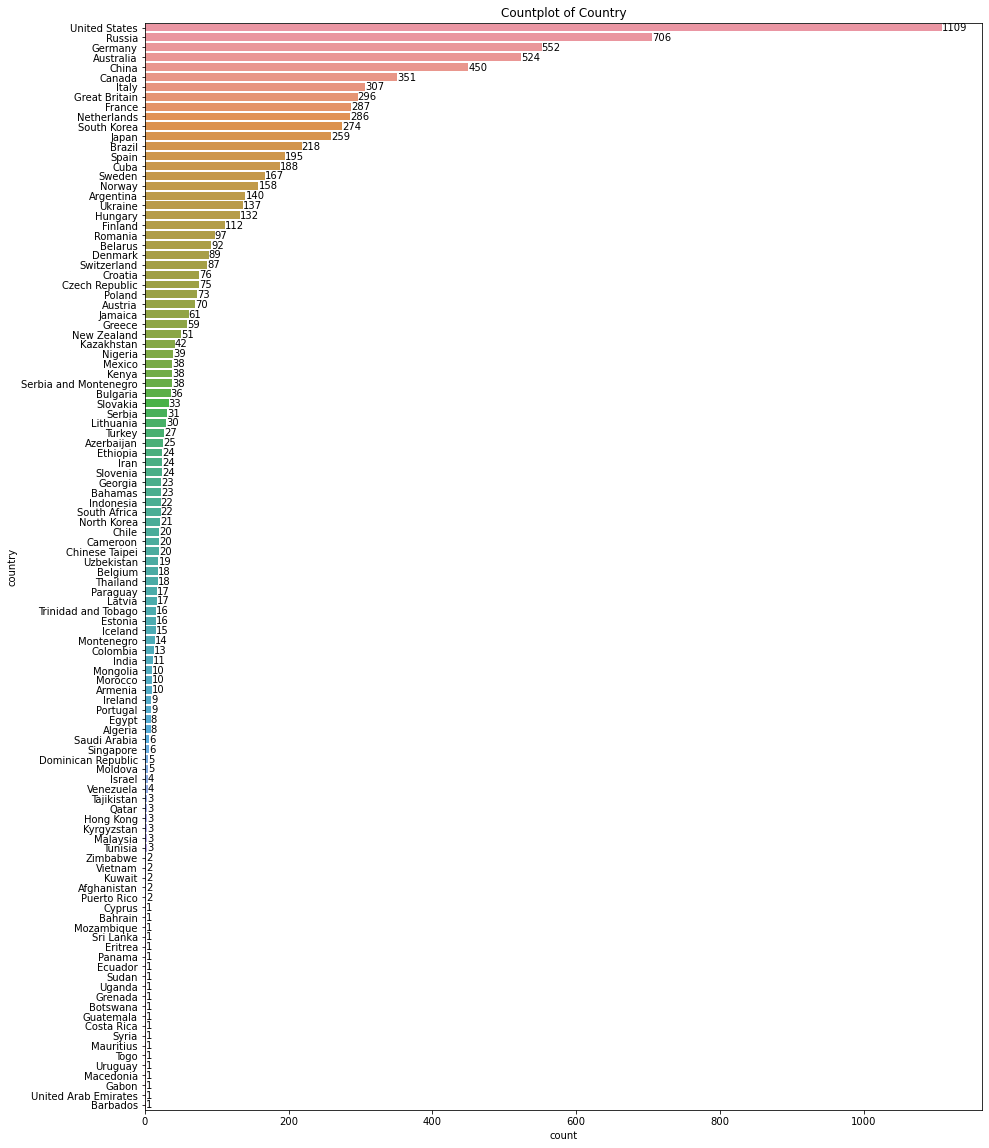

In [96]:
plt.figure(figsize=(15,20))  
ax = sns.countplot(y = 'country', data=Olympic,  order = Olympic['country'].value_counts().index)
ax.bar_label(ax.containers[0], label_type='edge')
plt.title('Countplot of Country')
plt.show()

* **From this above plot we can see that -from 'United States' country participated most in Olympic and Won most of the medals than other countries.**
* **And 'Russia' country is in second place in participation and winning medals.**
* **And there are so many countries are participated least and won least medals.**

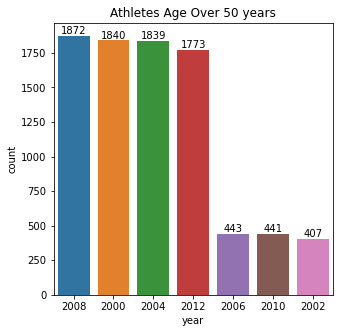

In [97]:
# VISUALIZING THE TOTAL COUNT OF SPORTS AND VISUALIZING IN ORDER OF YEAR

plt.figure(figsize=(5, 5))
plt.tight_layout()
ax = sns.countplot(x = 'year', data = Olympic,  order = Olympic['year'].value_counts().index)
ax.bar_label(ax.containers[0], label_type='edge')
plt.title('Athletes Age Over 50 years')
plt.show()

* **From above plot we can see that in 2008 year conucted more sports and in 2002 year counducted least sports.**

**2. BIVARIATE ANALYSIS :**

* **Bivariate analysis is one of the statistical analysis where two variables are observed. One variable here is dependent while the other is independent. These variables are usually denoted by X and Y. So, here we analyse the changes occured between the two variables and to what extent.**

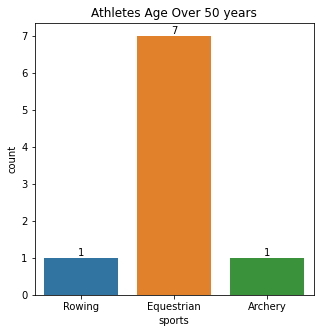

In [98]:
# CHECKING THAT ATHLETES WHO ARE OVER THE AGE OF '50'
# BY USING COUNT PLOT VISUALIZING  THAT THE 
# COUNT OF ALL ATHLETES WHO ARE OVER AGE 50 AND FROM ALL SPORTS.

athlete_over_50 = Olympic['sports'][Olympic['age'] > 50]
plt.figure(figsize=(5, 5))
plt.tight_layout()
ax = sns.countplot(athlete_over_50)
ax.bar_label(ax.containers[0], label_type='edge')
plt.title('Athletes Age Over 50 years')
plt.show()

* **We can see that there are 9 athletes who are over 50 years age. And in that 'Equestrian' sport played most.**

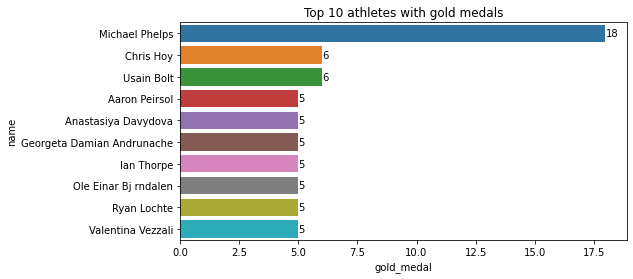

In [99]:
## VISUALIZING THAT WHO HAVE WON THE MOST GOLD MEDALS and PRINTING TOP 10 OF THEM BY USING BAR PLOT

gold_athlete = Olympic[[ 'gold_medal', 'name']].groupby('name').sum('gold_medal').nlargest(10, 'gold_medal')
plt.figure(figsize=(8,4))
ax = sns.barplot(x = gold_athlete.gold_medal, y = gold_athlete.index)
ax.bar_label(ax.containers[0], label_type='edge')
plt.title('Top 10 athletes with gold medals')
plt.show()

**==> From all athletes and all years "MICHAEL PHELPS" won the highest gold medals. He won "18" gold medals.**

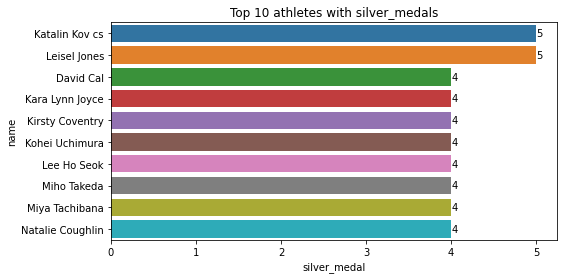

In [100]:
## VISUALIZING THAT WHO HAVE WON THE MOST SILVER MEDALS and PRINTING TOP 10 OF THEM  BY USING BAR PLOT

silver_athlete = Olympic[[ 'silver_medal', 'name']].groupby('name').sum('silver_medal').nlargest(10, 'silver_medal')
plt.figure(figsize=(8,4))
ax = sns.barplot(x = silver_athlete.silver_medal, y = silver_athlete.index)
ax.bar_label(ax.containers[0], label_type='edge')
plt.title('Top 10 athletes with silver_medals')
plt.show()

**==> From the above plot we can see that "KATALIN KOV CS" and "LEISEL JONES" both of them won most silver medals. And they have won 5 silver medals.**

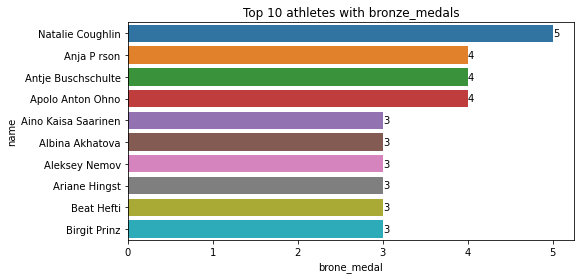

In [101]:
## VISUALIZING THAT WHO HAVE WON THE MOST BRONZE MEDALS and PRINTING TOP 10 OF THEM  BY USING BAR PLOT

bronze_athlete = Olympic[[ 'brone_medal', 'name']].groupby('name').sum('brone_medal').nlargest(10, 'brone_medal')
plt.figure(figsize=(8,4))
ax = sns.barplot(x = bronze_athlete.brone_medal, y = bronze_athlete.index)
ax.bar_label(ax.containers[0], label_type='edge')
plt.title('Top 10 athletes with bronze_medals')
plt.show()

**==> "NATALIE COUGHLIN" won most Bronze medals.**

Text(0.5, 1.0, 'The variation of Age of athletes over time')

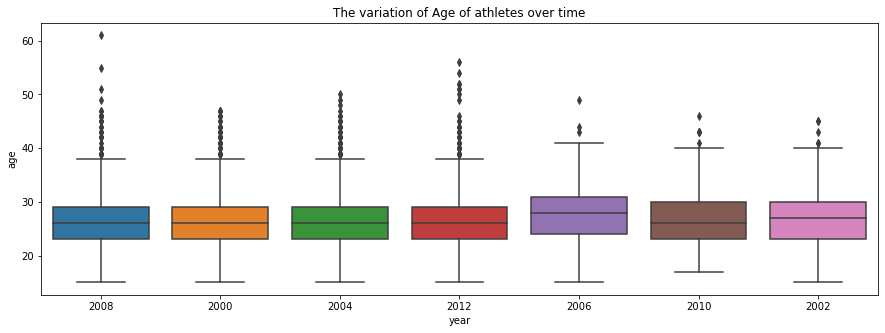

In [102]:
# VISUALISING THE VARIATION OF AGE OF ATHLETES OVER TIME BY USING BOXPLOT 
# AND USING ORDER IN BOXPLOT TO GET IN ORDER OF COUNT

plt.figure(figsize = (15, 5))
sns.boxplot('year', 'age', data = Olympic, order = Olympic['year'].value_counts().index)
plt.title('The variation of Age of athletes over time')

* **From above plot we can absorb that in 2008, 2000, 2004 and 2012 years athletes who are over 35 years old are played much as we campare to 2006, 2010 and 2002. The variation age of athletes changing over the time.**

**MULTIVARIATE ANALYSIS :**

* **CORRELATION ANALYSIS :**
 * **Correlation analysis in research is a statistical method used to measure the strength of the linear relationship between two variables and compute their association. Correlation analysis calculates the level of change in one variable due to the change in the other.**
 * **Correlation analysis is used to quantify the degree to which two variables are related. Through the correlation analysis, you evaluate correlation coefficient that tells you how much one variable changes when the other one does. Correlation analysis provides you with a linear relationship between two variables.**

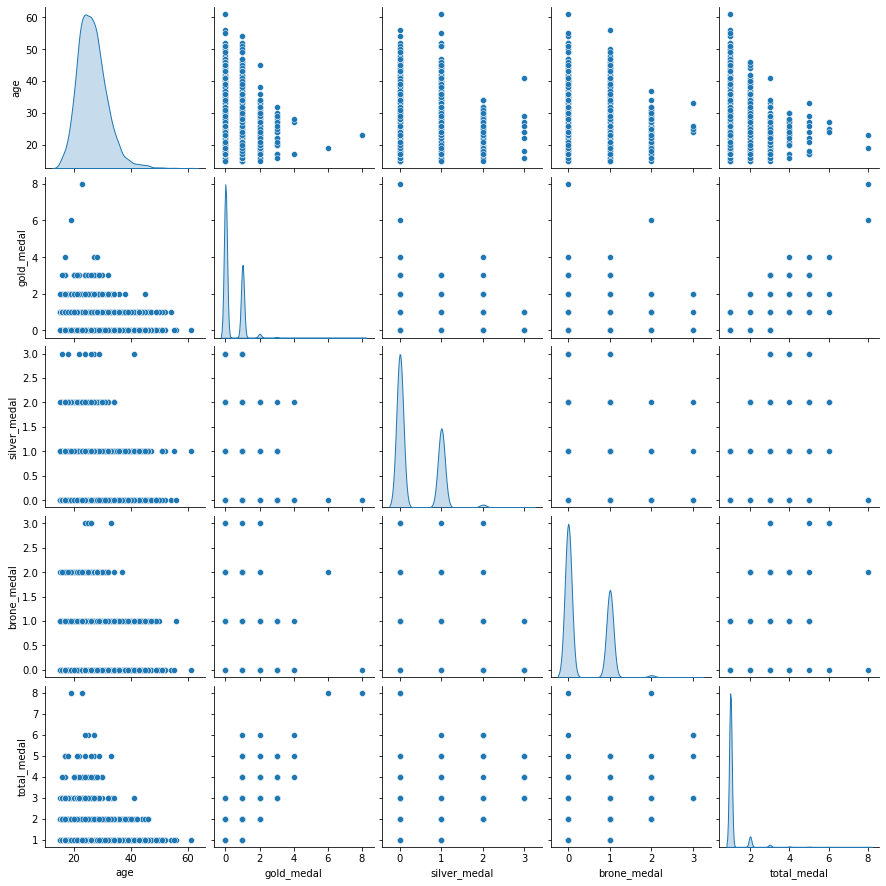

In [103]:
# USING PAIR PLOT TO CHECK THE BESY SET OF FEATURES TO ECPLAIN A RELATIONSHIP BETWEEN TEO VARIABLES
# OR TO FORM THE MOST SEPERATED CLUSTERS

sns.pairplot(Olympic, diag_kind = 'kde')

<AxesSubplot:>

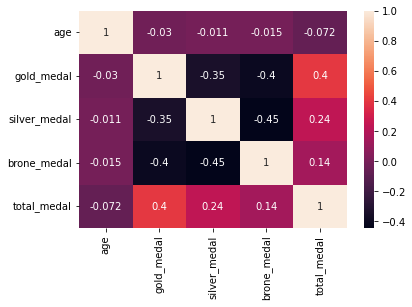

In [104]:
# USING HEATMAP TO CHECK THAT HOW EACH VARIABLE IS CORRELATED TO EACH OTHER 

sns.heatmap(Olympic.corr(), annot = True)

**==> As we can see from above heat map there is not much correlated to each other variables.**

###### Q6. Please check if the age dataset is skewed or symmetric. Based on results perform transformation.


Text(0.5, 1.0, 'distribution of Age')

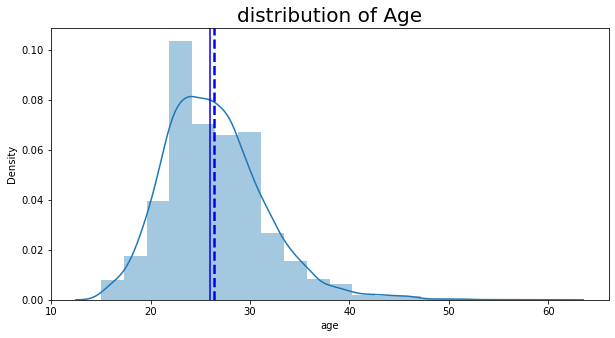

In [105]:
## VISUALIZING DISTRIBUTION OF 'AGE' BY USING DISTRIBUTION PLOT 
plt.figure(figsize=(10,5))
sns.distplot(Olympic["age"],bins = 20, kde = True)

# GIVING MEAN AND MEDIAN TO THE DISTRIBUTION  
plt.axvline(x=Olympic["age"].mean(),ls='--',lw=2.5,color='blue',label="mean")  # fixing 'mean' line and its characteristics.
plt.axvline(x=Olympic["age"].median(),color='blue',label="median") # fixing 'median' line and its characteristics.
plt.show

## GIVING TITLE TO PLOT 
plt.title('distribution of Age',fontsize=20)

In [106]:
# FINDING THE SKEWNESS VALUE USING SKEW() FUNCTION.

Olympic['age'].skew()

0.8591075017313358

* **The skewness value of "Age" is '0.9'.**
* **IF THE SKEWNESS VALUES IS BETWEEN ["-1 TO -0.5 OR 0.5 TO 1"], THEN THE DATA IS "MODERATELY SKEWED DATA"**
* **As we can see in The above plot 'age' dataset is seems to be medarately right skewed.**
 * **So, for reducing the skewness "Transformation" is used. Transformation can be done by "Square root(sqrt) transformation", "Cube root(cbrt) transformation", "Log transformation", "Boxcox transormation" and many others.**
* **Using log transformation to transforming the skewd data into normally distributed data.**

**LOG TRANSFORMATION :**

Text(0.5, 1.0, 'distribution of Age')

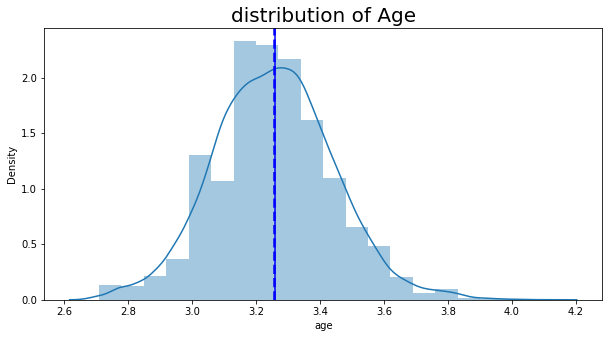

In [107]:
## BY USING LOG TRANSFORMATION to TRANSFORMING THE SKEWDDATA INTO NORMAL DISTRIBUTION
log_age = np.log(Olympic['age'])

## VISUALIZING DISTRIBUTION OF 'AGE' BY USING DISTRIBUTION PLOT 
plt.figure(figsize=(10,5))
sns.distplot(log_age,bins = 20, kde = True)

# GIVING MEAN AND MEDIAN TO THE DISTRIBUTION  
plt.axvline(x=log_age.mean(),ls='--',lw=2.5,color='blue',label="mean")  # fixing 'mean' line and its characteristics.
plt.axvline(x=log_age.median(),color='blue',label="median") # fixing 'median' line and its characteristics.
plt.show

## GIVING TITLE TO PLOT 
plt.title('distribution of Age',fontsize=20)

**==> After doing 'Log Transformation' the age data is now noramlly distributed.**

###### Q7. Please perform appropriate numerical measures on each column and report them accordingly.

In [108]:
# PERFORMING THE STATISTICAL MEASURES FOR NUMERICAL VARIABLES

Olympic.describe().T

count       mean       std   min   25%   50%   75%   max
age           8615.0  26.405432  5.101526  15.0  23.0  26.0  29.0  61.0
gold_medal    8615.0   0.364829  0.545401   0.0   0.0   0.0   1.0   8.0
silver_medal  8615.0   0.363088  0.511564   0.0   0.0   0.0   1.0   3.0
brone_medal   8615.0   0.377829  0.505044   0.0   0.0   0.0   1.0   3.0
total_medal   8615.0   1.105746  0.408958   1.0   1.0   1.0   1.0   8.0

**==> From the above statistical measures information we are getting Total_Count, mean_value, standard deviation, minimum_value, maximum_value, 25th, 50th and 75 percetile values of all variables.**

In [109]:
# NUMERICAL MEASURES FOR THE CATEGORICAL DATA

Olympic.describe(include=object)

name        country  year Date_Given     sports
count         8615           8615  8615       8615       8615
unique        6956            110     7          7         49
top     Matt Wells  United States  2008  8/24/2008  Athletics
freq             4           1109  1872       1872        687

**==> From above information we are getting numerical measure of all categorical data in the dataset which are 'count', 'unique_values', 'Top_value' and 'Frequency' from all variables.**

###### Q8. Please list the top 10 countries with the gold medal, then top10 countries with the silver medal, then bronze medal and the total medal.

In [110]:
# GETTING THE TOP 10 COUNRIES WITH GOLD MEDALS 
# USING GROUP BY TO COUNTRY COLUMN AND ADD ALL GOLD MEDALS WITH EACH COUNTRY
# AND PRINTING TOP 10 VALUES 

TOP_GOLD = Olympic[[ 'gold_medal', 'country']].groupby('country').sum('gold_medal').nlargest(10, 'gold_medal')
TOP_GOLD

gold_medal
country                  
United States         552
China                 234
Russia                234
Germany               223
Canada                168
Australia             163
Great Britain         124
South Korea           110
France                108
Netherlands           101

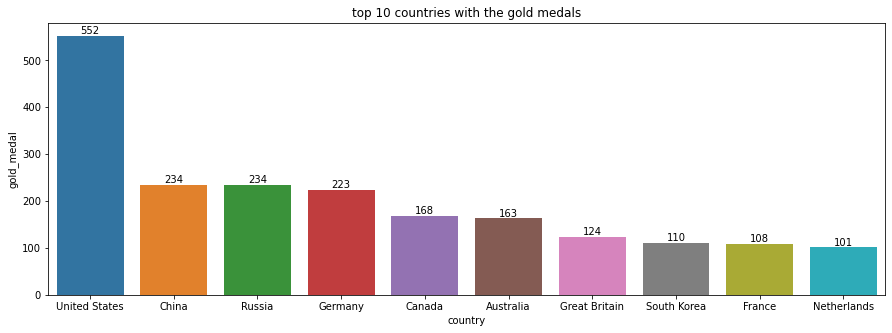

In [111]:
# VISUALISING TOP 10 COUNTRIES WHO WON THE MOST GOLD MEDALS BY USING BARPLOT
# FIXING THE SIZE OF THE GRAPH

plt.figure(figsize=(15,5)) 

# PERFORMING BARPLOT
ax = sns.barplot(x = TOP_GOLD.index, y = TOP_GOLD.gold_medal) 

# ADDING THE TOTAL COUNT OF GOLD_MEDALS ON TOP OF BAR'S
ax.bar_label(ax.containers[0], label_type='edge') 

# GIVING TITLE
plt.title('top 10 countries with the gold medals') 
plt.show()

**==>From the above information and the bar plot we can see These are the top 10 countries who won the most "Gold medals".**

**==> From that top 10 countries "United States" won most gold medals(552).**

In [112]:
# GETTING THE TOP 10 COUNRIES WITH SILVER MEDALS 
# USING GROUP BY TO COUNTRY COLUMN AND ADDING ALL SILVER MEDALS WITH EACH COUNTRY
# AND PRINTING TOP 10 VALUES 

TOP_SILVER = Olympic[[ 'silver_medal', 'country']].groupby('country').sum('silver_medal').nlargest(10, 'silver_medal')
TOP_SILVER

silver_medal
country                    
United States           440
Australia               226
Russia                  221
Germany                 183
China                   156
Netherlands             135
Spain                   116
Japan                   112
France                  107
Italy                   103

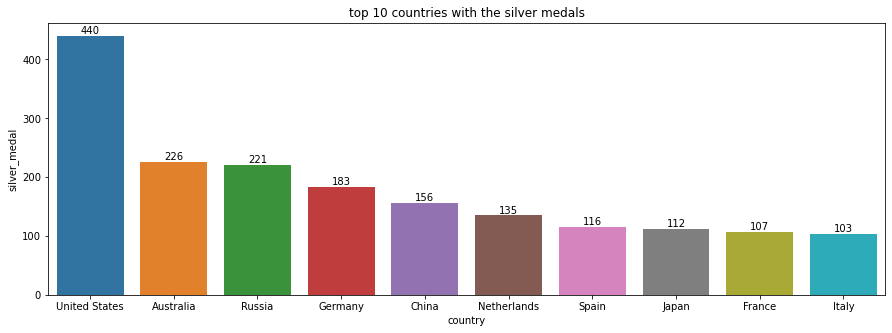

In [113]:
# VISUALISING TOP 10 COUNTRIES WHO WON THE MOST SILVER MEDALS BY USING BARPLOT

plt.figure(figsize=(15,5))
ax = sns.barplot(x = TOP_SILVER.index, y = TOP_SILVER.silver_medal)

# ADDING THE TOTAL COUNT OF SILVER_MEDALS ON TOP OF BAR'S
ax.bar_label(ax.containers[0], label_type='edge') 
plt.title('top 10 countries with the silver medals')
plt.show()

**==> From the above information and the bar plot we can see These are the top 10 countries who won the most "Silver medals".**

**==> And again from that top 10 countries "United States" won most silver medals(440).**

In [114]:
# GETTING THE TOP 10 COUNRIES WITH BRONZE MEDALS 
# USING GROUP BY TO COUNTRY COLUMN AND ADDING ALL BRONZE MEDALS WITH EACH COUNTRY
# AND PRINTING TOP 10 VALUES 

TOP_BRONZE = Olympic[[ 'brone_medal', 'country']].groupby('country').sum('brone_medal').nlargest(10, 'brone_medal')
TOP_BRONZE

brone_medal
country                   
United States          320
Russia                 313
Germany                223
Australia              220
Italy                  142
China                  140
Japan                  113
South Korea            105
Canada                 104
France                 103

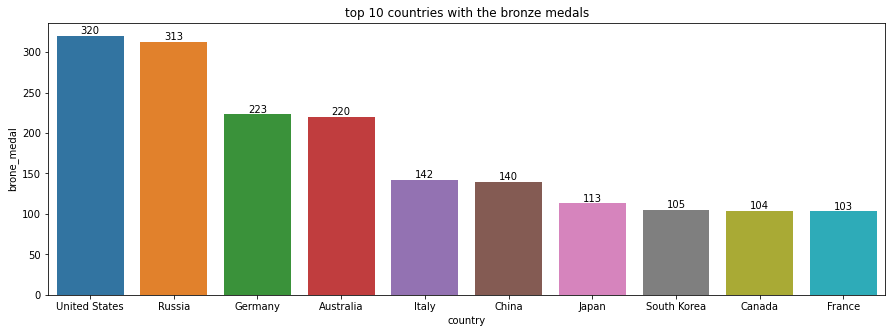

In [115]:
# VISUALISING TOP 10 COUNTRIES WHO WON THE MOST BRONZE MEDALS BY USING BARPLOT

plt.figure(figsize=(15,5))
ax = sns.barplot(x = TOP_BRONZE.index, y = TOP_BRONZE.brone_medal) 

# ADDING THE TOTAL COUNT OF BRONZE_MEDALS ON TOP OF BAR'S
ax.bar_label(ax.containers[0], label_type='edge')
plt.title('top 10 countries with the bronze medals')
plt.show()

**==> From the above information and the bar plot we can see These are the top 10 countries who won the most "Bronze Medals".**

**==> From that top 10 countries "United States" won most silver medals(320) and "Russia" is 2nd country who won the most "Bronze Medals" .**

In [116]:
# GETTING THE TOP 10 COUNRIES WITH ALL THE THREE MEDALS 
# USING GROUP BY TO COUNTRY COLUMN AND ADDING ALL TOTAL MEDALS WITH EACH COUNTRY
# AND PRINTING TOP 10 VALUES 

TOTAL_MEDALS = Olympic[[ 'total_medal', 'country']].groupby('country').sum('total_medal').nlargest(10, 'total_medal')
TOTAL_MEDALS

total_medal
country                   
United States         1312
Russia                 768
Germany                629
Australia              609
China                  530
Canada                 370
Italy                  331
Great Britain          322
France                 318
Netherlands            318

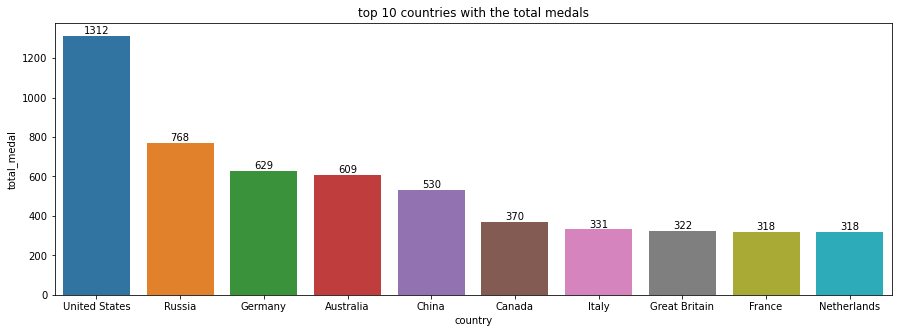

In [117]:
# VISUALISING TOP 10 COUNTRIES WHO WON THE MOST MEDALS BY USING BARPLOT

plt.figure(figsize=(15,5))
ax = sns.barplot(x = TOTAL_MEDALS.index, y = TOTAL_MEDALS.total_medal)

# ADDING THE TOTAL COUNT OF BRONZE_MEDALS ON TOP OF BAR'S
ax.bar_label(ax.containers[0], label_type='edge') 
plt.title('top 10 countries with the total medals')
plt.show()

**==> As we can see that among all the countries "United States" won the most medals.**

**==> "United_States" won '1312' total_medals.**